<a href="https://colab.research.google.com/github/m0hmedtarek/Coursera_Capstone/blob/master/Selected_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mohamed Tarek Mohamed Khalifa - 20160358
#Mohamed Abd El-Kader Mohamed Abd El-kader - 20160365
#Ahmed Mostafa Abd El-Aal Mahmoud - 20160049

# Introduction

Ethnicity information is an integral part of human identity, and a useful identifier for various applications ranging from video surveillance, targeted advertisement to social media profiling.

This project demonstrates how to classify the human's race based on an image of their face using 3 different supervised learning algorithms (CNN, SVM and DT) and FairFace dataset that has 90 thousand images of 7 different races that we have narrowed down into 4 main ones.

# Related Work

**Face Attribute Detection.** The ChaLearn “Looking at People” challenge from 2016 (Escalera et al., 2016) provides the Faces of the World (FotW) dataset, which annotates gender and the presence of smiling on faces. 

**Fairness in Machine Learning.** (Dwork et al., 2012) demonstrates the importance of “Fairness through Awareness”, understanding sensitive characteristics like gender and race in order to build demographically inclusive models.


# Preprocessing Our Data

## Downloading data and unzipping

In [0]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1Z1RqRo0_JiavaZw2yzZG6WETdZQ8qX86' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1Z1RqRo0_JiavaZw2yzZG6WETdZQ8qX86" -O Trainval && rm -rf /tmp/cookies.txt
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1i1L3Yqwaio7YSOCj7ftgk8ZZchPG7dmH' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1i1L3Yqwaio7YSOCj7ftgk8ZZchPG7dmH" -O trainlabel && rm -rf /tmp/cookies.txt
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1wOdja-ezstMEp81tX1a-EYkFebev4h7D' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1wOdja-ezstMEp81tX1a-EYkFebev4h7D" -O vallabel && rm -rf /tmp/cookies.txt

--2020-06-05 14:48:04--  https://docs.google.com/uc?export=download&confirm=SZmO&id=1Z1RqRo0_JiavaZw2yzZG6WETdZQ8qX86
Resolving docs.google.com (docs.google.com)... 173.194.218.139, 173.194.218.100, 173.194.218.138, ...
Connecting to docs.google.com (docs.google.com)|173.194.218.139|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-00-9c-docs.googleusercontent.com/docs/securesc/51mfvkuma8s0c5dov4tog6p1l1d2mjsq/9k2eouh7bab39jjjjrbpbvi5a3cneg4r/1591368450000/03161587497725415728/00768261092566872710Z/1Z1RqRo0_JiavaZw2yzZG6WETdZQ8qX86?e=download [following]
--2020-06-05 14:48:04--  https://doc-00-9c-docs.googleusercontent.com/docs/securesc/51mfvkuma8s0c5dov4tog6p1l1d2mjsq/9k2eouh7bab39jjjjrbpbvi5a3cneg4r/1591368450000/03161587497725415728/00768261092566872710Z/1Z1RqRo0_JiavaZw2yzZG6WETdZQ8qX86?e=download
Resolving doc-00-9c-docs.googleusercontent.com (doc-00-9c-docs.googleusercontent.com)... 172.217.193.132, 2607:f8b0:400c:c03::84
Conne

In [0]:
!unzip Trainval -d data

Streaming output truncated to the last 5000 lines.
  inflating: data/val/5596.jpg       
  inflating: data/val/5875.jpg       
  inflating: data/val/5878.jpg       
  inflating: data/val/5879.jpg       
  inflating: data/val/5883.jpg       
  inflating: data/val/6126.jpg       
  inflating: data/val/6132.jpg       
  inflating: data/val/6144.jpg       
  inflating: data/val/6150.jpg       
  inflating: data/val/6340.jpg       
  inflating: data/val/7190.jpg       
  inflating: data/val/7734.jpg       
  inflating: data/val/7747.jpg       
  inflating: data/val/7872.jpg       
  inflating: data/val/7940.jpg       
  inflating: data/val/8065.jpg       
  inflating: data/val/8069.jpg       
  inflating: data/val/8125.jpg       
  inflating: data/val/8202.jpg       
  inflating: data/val/8204.jpg       
  inflating: data/val/8205.jpg       
  inflating: data/val/8268.jpg       
  inflating: data/val/8270.jpg       
  inflating: data/val/8281.jpg       
  inflating: data/val/8291.jpg       

## Load photos into Data Frame & import library

In [0]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn import svm, metrics, datasets
from google.colab.patches import cv2_imshow
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.svm import SVC
import pandas as pd
import os
import cv2
import tensorflow as tf
import numpy as np
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt


In [0]:

dim = 3
s = 32
def load_data(data_directory):
    directories = [d for d in os.listdir(data_directory) 
                   if os.path.isdir(os.path.join(data_directory, d))]
    print("exploreing in ",directories)
    images = []
    file_name = []
    
    for d in directories:
        
        label_directory = os.path.join(data_directory, d)
        
        file_names = [os.path.join(label_directory, f) 
                      for f in os.listdir(label_directory) 
                      ]
        
        for f in file_names:

            i =  cv2.imread(f,1)
            i = cv2.resize(i, (s,s), interpolation = cv2.INTER_AREA)
            #i = ''cv2.cvtColor(i, cv2.COLOR_BGR2GRAY)''
            
            images.append(i)
            file_name.append(f[5:])
              
    
    return images, file_name

df = pd.DataFrame()
path = 'data'
df['data'],df['file'] = load_data(os.path.join(path))



exploreing in  ['train', 'val']


## Normalizing data and preprocessing


In [0]:
#nolrmalize photos
print(df['data'].head())
df['data'] /= 255

df['data'].head()

0    [[[8, 7, 9], [13, 12, 14], [11, 10, 12], [12, ...
1    [[[65, 52, 52], [64, 50, 51], [66, 51, 51], [6...
2    [[[45, 45, 36], [58, 57, 52], [74, 76, 77], [9...
3    [[[5, 10, 15], [9, 12, 23], [8, 11, 22], [4, 1...
4    [[[2, 4, 5], [4, 6, 7], [4, 6, 7], [4, 6, 7], ...
Name: data, dtype: object


0    [[[0.03137254901960784, 0.027450980392156862, ...
1    [[[0.2549019607843137, 0.20392156862745098, 0....
2    [[[0.17647058823529413, 0.17647058823529413, 0...
3    [[[0.0196078431372549, 0.0392156862745098, 0.0...
4    [[[0.00784313725490196, 0.01568627450980392, 0...
Name: data, dtype: object

In [0]:
tl = pd.read_csv('trainlabel')
vl = pd.read_csv('vallabel')

In [0]:
dl = pd.concat([tl , vl])
dl.head()

,file,age,gender,race,service_test
0,train/1.jpg,50-59,Male,East Asian,True
1,train/2.jpg,30-39,Female,Indian,False
2,train/3.jpg,3-9,Female,Black,False
3,train/4.jpg,20-29,Female,Indian,True
4,train/5.jpg,20-29,Female,Indian,True


In [0]:
 fdf = pd.merge(df,
 dl,
 how='inner',
 on='file')

In [0]:
fdf = fdf[fdf['service_test']]


In [0]:
def merge_race(df):
  result = df.copy()
  data = (df['race']=='East Asian') | (df['race']=='Southeast Asian')
  result.loc[data,'race'] = 'Asian'
  data = df['race']=='Middle Eastern'
  result.loc[data,'race'] = 'White'
  result.drop(df[df['race']=='Latino_Hispanic'].index, inplace=True)
  return result
fdf = merge_race(fdf)

In [0]:
fdf.groupby('race').count()

,data,file,age,gender,service_test
race,,,,,
Asian,12945,12945,12945,12945,12945
Black,6486,6486,6486,6486,6486
Indian,6484,6484,6484,6484,6484
White,13006,13006,13006,13006,13006


In [0]:
def reshape_df(df,n=2000):
    """
    reshape a dataframe based on the race
    Parameters
    ----------
    df : dataframe which going to be reshaped
    n : number of instance for each race

    Returns
    -------
    dataframe
    """
    data = df.groupby('race')
    data = data.apply(lambda x: x.sample(n=n, replace=True)).sample(frac=1).reset_index(drop=True)
    return data
fdf = reshape_df(fdf,3000)

In [0]:
fdf.groupby('race').count()

,data,file,age,gender,service_test
race,,,,,
Asian,3000,3000,3000,3000,3000
Black,3000,3000,3000,3000,3000
Indian,3000,3000,3000,3000,3000
White,3000,3000,3000,3000,3000


In [0]:
#encode label

labellencoder_z = LabelEncoder()
fdf['encoded label'] =labellencoder_z.fit_transform(fdf['race'])

In [0]:
#split data into train and test

X_train, X_test, y_train, y_test = train_test_split(np.array([i for i in fdf.loc[:, 'data']]).reshape(-1,s,s,dim),
                                    np.array([i for i in fdf.loc[:,'encoded label']]), test_size=0.2, random_state=42)



# Methodologies and Implemintation

## CNN Model

In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(s, s, dim)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))

model.add(layers.Dense(4))

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train , y_train
                  , epochs=15, batch_size= 100 ,
                   validation_data = (X_test ,y_test))

Epoch 1/15
96/96 [==============================] - 11s 113ms/step - loss: 1.3064 - accuracy: 0.3746 - val_loss: 1.1822 - val_accuracy: 0.4825
Epoch 2/15
96/96 [==============================] - 11s 112ms/step - loss: 1.1509 - accuracy: 0.5008 - val_loss: 1.0761 - val_accuracy: 0.5537
Epoch 3/15
96/96 [==============================] - 11s 112ms/step - loss: 1.0334 - accuracy: 0.5689 - val_loss: 1.0050 - val_accuracy: 0.5954
Epoch 4/15
96/96 [==============================] - 11s 113ms/step - loss: 0.9508 - accuracy: 0.6119 - val_loss: 0.9343 - val_accuracy: 0.6167
Epoch 5/15
96/96 [==============================] - 11s 111ms/step - loss: 0.8859 - accuracy: 0.6384 - val_loss: 0.8941 - val_accuracy: 0.6446
Epoch 6/15
96/96 [==============================] - 11s 111ms/step - loss: 0.8326 - accuracy: 0.6647 - val_loss: 0.8735 - val_accuracy: 0.6438
Epoch 7/15
96/96 [==============================] - 11s 111ms/step - loss: 0.7765 - accuracy: 0.6932 - val_loss: 0.8516 - val_accuracy: 0.6637

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Classification report for - 
<tensorflow.python.keras.engine.sequential.Sequential object at 0x7fdc9a04dc88>:
              precision    recall  f1-score   support

           0       0.79      0.61      0.69       592
           1       0.80      0.73      0.76       614
           2       0.64      0.69      0.66       591
           3       0.59      0.74      0.66       603

    accuracy                           0.69      2400
   macro avg       0.71      0.69      0.69      2400
weighted avg       0.71      0.69      0.69      2400




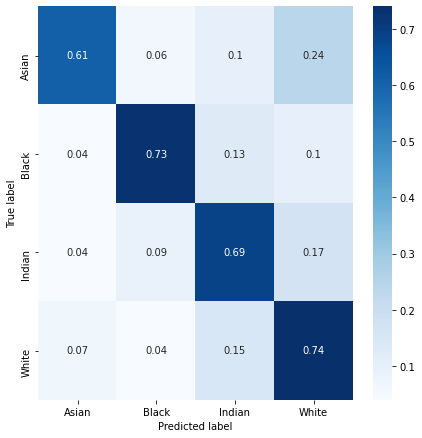

In [0]:
y_pred =model.predict_classes(X_test)

print("Classification report for - \n{}:\n{}\n".format(
    model, metrics.classification_report(y_test, y_pred)))

con_mat = tf.math.confusion_matrix(labels=y_test, predictions=y_pred).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)
 
con_mat_df = pd.DataFrame(con_mat_norm,
                     index = labellencoder_z.classes_, 
                     columns = labellencoder_z.classes_)

figure = plt.figure(figsize=(6, 6))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## SVM Model

In [0]:

model_SVM = SVC()
model_SVM.fit(X_train.reshape(-1,s*s*dim), y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Classification report for - 
<tensorflow.python.keras.engine.sequential.Sequential object at 0x7fdc9a04dc88>:
              precision    recall  f1-score   support

           0       0.58      0.55      0.56       592
           1       0.65      0.71      0.68       614
           2       0.60      0.57      0.59       591
           3       0.54      0.55      0.54       603

    accuracy                           0.59      2400
   macro avg       0.59      0.59      0.59      2400
weighted avg       0.59      0.59      0.59      2400




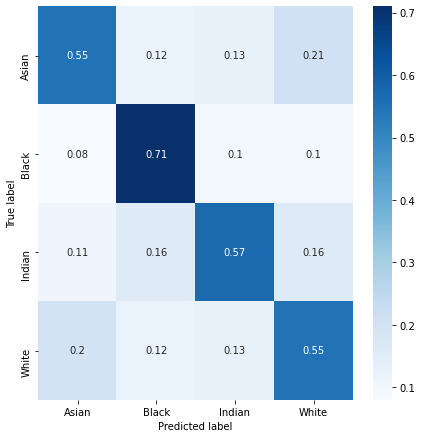

In [0]:
y_pred_svm =model_SVM.predict(X_test.reshape(-1,s*s*dim))

print("Classification report for - \n{}:\n{}\n".format(
    model, metrics.classification_report(y_test, y_pred_svm)))

con_mat = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_svm).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)
 
con_mat_df = pd.DataFrame(con_mat_norm,
                     index = labellencoder_z.classes_, 
                     columns = labellencoder_z.classes_)

figure = plt.figure(figsize=(6, 6))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## DecisionTree Model

In [0]:
treee = tree.DecisionTreeClassifier(max_depth= 10)
treee.fit(X_train.reshape(-1,s*s*dim), y_train)
print(treee.score(X_train.reshape(-1,s*s*dim), y_train))
treee.score(X_test.reshape(-1,s*s*dim), y_test)

0.7219791666666666


0.4529166666666667

Classification report for - 
<tensorflow.python.keras.engine.sequential.Sequential object at 0x7fdc9a04dc88>:
              precision    recall  f1-score   support

           0       0.44      0.41      0.42       592
           1       0.55      0.51      0.53       614
           2       0.40      0.47      0.43       591
           3       0.43      0.42      0.43       603

    accuracy                           0.45      2400
   macro avg       0.46      0.45      0.45      2400
weighted avg       0.46      0.45      0.45      2400




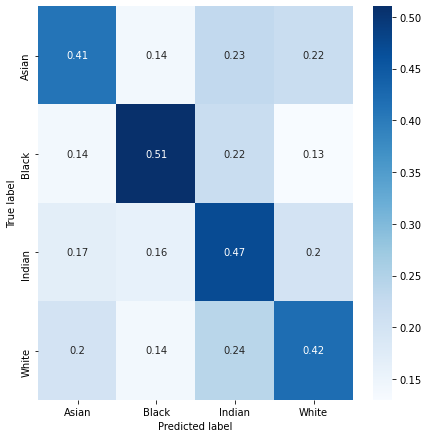

In [0]:
y_pred_tree =treee.predict(X_test.reshape(-1,s*s*dim))

print("Classification report for - \n{}:\n{}\n".format(
    model, metrics.classification_report(y_test, y_pred_tree)))

con_mat = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_tree).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)
 
con_mat_df = pd.DataFrame(con_mat_norm,
                     index = labellencoder_z.classes_, 
                     columns = labellencoder_z.classes_)

figure = plt.figure(figsize=(6, 6))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Ensemble Learning Stacking

## Level 1

In [0]:
#prepare data to train level 2 in stack
dtf = pd.DataFrame()
dtf['svm'] = model_SVM.predict(X_train.reshape(-1,s*s*dim))
dtf['cnn'] = model.predict_classes(X_train)
dtf['tree'] = tree.predict(X_train.reshape(-1,s*s*dim))
dtf['label'] = y_train
dtf.head()

,svm,cnn,tree,label
0,1,1,0,1
1,3,3,2,3
2,1,1,1,1
3,0,0,0,0
4,0,1,1,1


## LEVEL 2

In [0]:

from sklearn import tree

level2  = tree.DecisionTreeClassifier()
level2  = level2.fit(dtf[['svm','cnn','tree']], dtf['label'])

In [0]:
#prepare data to test
dtfa = pd.DataFrame()
dtfa['svm'] = y_pred_svm
dtfa['cnn'] = 'y_pred'
dtfa['tree'] = y_pred_tree
dtfa['label'] = y_test
dtfa.head()

,svm,cnn,tree,label
0,3,0,3,0
1,1,1,0,1
2,3,3,3,3
3,3,3,2,3
4,2,2,1,1


In [0]:
print(level2.score(dtf[['svm','cnn','tree']], dtf['label']))
print(level2.score(dtfa[['svm','cnn','tree']], dtfa['label']))



0.9005208333333333
0.68625


Classification report for - 
<tensorflow.python.keras.engine.sequential.Sequential object at 0x7fdc9a04dc88>:
              precision    recall  f1-score   support

           0       0.74      0.64      0.68       592
           1       0.77      0.76      0.77       614
           2       0.64      0.69      0.66       591
           3       0.61      0.66      0.63       603

    accuracy                           0.69      2400
   macro avg       0.69      0.69      0.69      2400
weighted avg       0.69      0.69      0.69      2400




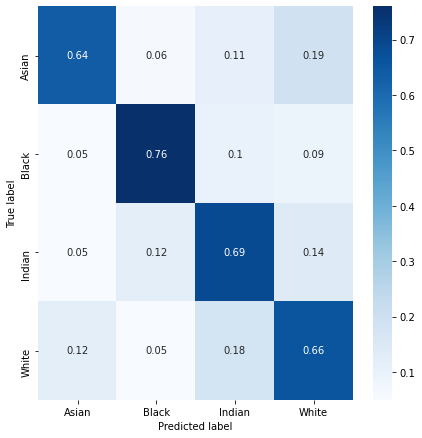

In [0]:
y_pred_level2 =level2.predict(dtfa[['svm','cnn','tree']])

print("Classification report for - \n{}:\n{}\n".format(
    model, metrics.classification_report(y_test, y_pred_level2)))

con_mat = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_level2).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)
 
con_mat_df = pd.DataFrame(con_mat_norm,
                     index = labellencoder_z.classes_, 
                     columns = labellencoder_z.classes_)

figure = plt.figure(figsize=(6, 6))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

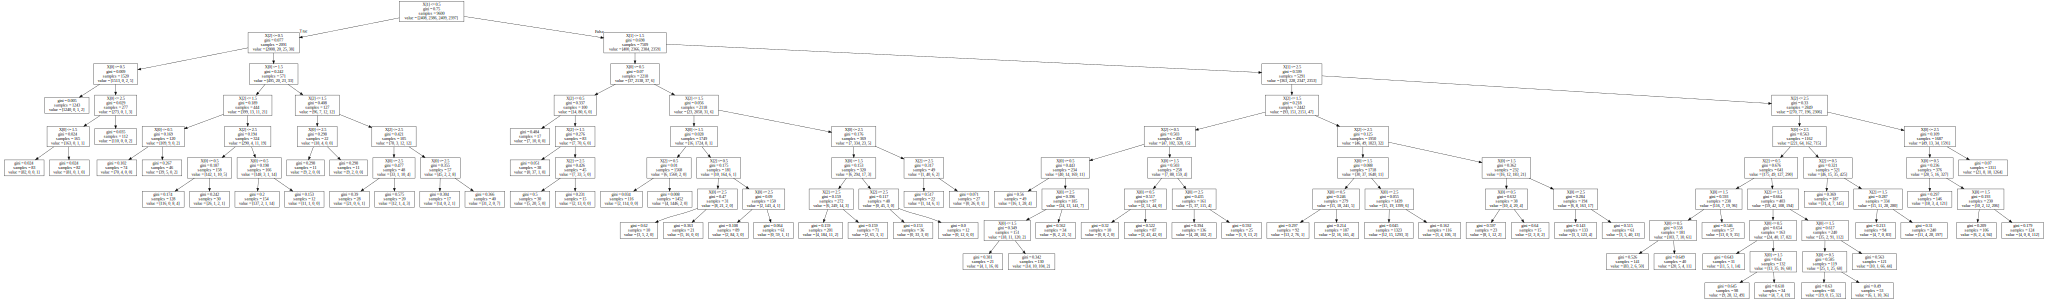

In [0]:
import graphviz 
dot_data = tree.export_graphviz(level2, out_file=None) 
graphviz.Source(dot_data  ) 


# Future Work

For the future work we can do two main things. Adding more classes, improving accuracy and integrating the classifier into applications.

As mention in the introduction our classifiers currently predictes only 4 different races, we will work into increasing the number of classes to make it more usable, we can also add different outputs such as age, gender, etc....

We plan to improve the accuracy by using more state-of-the art models.

And we also plan to add our final product into a real life application of general use.

# Results
For image classification tasks in general CNNs regulary have the best accuracies, and that was the case with our project as well. as it scored accuracy 70% while SVM scored accuracy 61% and Decision Tree score 48%.

# Conclusion
classifying human race can be easily done with fairface dataset, after merging similar races, we achieve 70% accuracy on our test-set.

# References
Dataset - https://arxiv.org/abs/1908.04913 <br>
Improving Face Attribute Detection - https://arxiv.org/pdf/1712.00193.pdf